# Sources:
- https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

# Import Libraries

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Get Device for Training

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


# Building Blocks
Let’s break down the layers in the FashionMNIST model. 

## sample image
To illustrate it, we will take a sample minibatch of 3 images of size 28x28 and see what happens to it as we pass it through the network.

In [17]:
# sample minibatch of 3 images
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [16]:
input_image

tensor([[[0.2391, 0.3316, 0.7639,  ..., 0.2150, 0.7327, 0.6073],
         [0.2287, 0.3643, 0.0266,  ..., 0.2557, 0.8740, 0.7171],
         [0.4822, 0.0709, 0.0277,  ..., 0.5004, 0.6863, 0.5986],
         ...,
         [0.8172, 0.1579, 0.2233,  ..., 0.4589, 0.6800, 0.8321],
         [0.1718, 0.4928, 0.6071,  ..., 0.5250, 0.9856, 0.3547],
         [0.8076, 0.5768, 0.9636,  ..., 0.6789, 0.1943, 0.5142]],

        [[0.3118, 0.0299, 0.9891,  ..., 0.1054, 0.1080, 0.3268],
         [0.6290, 0.5072, 0.6226,  ..., 0.7353, 0.9042, 0.1540],
         [0.9057, 0.9740, 0.8957,  ..., 0.1811, 0.5101, 0.2549],
         ...,
         [0.6396, 0.8761, 0.3859,  ..., 0.5628, 0.0973, 0.2900],
         [0.3749, 0.3523, 0.9285,  ..., 0.8574, 0.1024, 0.5881],
         [0.0300, 0.4045, 0.3007,  ..., 0.1426, 0.5842, 0.8821]],

        [[0.5150, 0.6860, 0.5156,  ..., 0.7420, 0.8619, 0.1310],
         [0.1153, 0.6639, 0.4073,  ..., 0.2324, 0.8800, 0.7939],
         [0.9116, 0.8560, 0.1382,  ..., 0.5782, 0.2327, 0.

## flatten
We initialize the nn.Flatten layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values ( the minibatch dimension (at dim=0) is maintained).

In [20]:
# flatten 2D 28x28 image into contiguous array of 784 pixel values
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [21]:
flat_image

tensor([[0.8513, 0.1169, 0.4704,  ..., 0.8231, 0.1939, 0.1485],
        [0.5758, 0.1419, 0.1909,  ..., 0.2079, 0.0981, 0.3570],
        [0.2345, 0.2361, 0.5813,  ..., 0.5600, 0.5440, 0.2803]])

## linear layer
The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.

In [22]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


## non-linaer activations
Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.

In this model, we use nn.ReLU between our linear layers, but there’s other activations to introduce non-linearity in your model.

In [23]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.6610,  0.2213,  0.0245,  0.0363, -0.4859,  0.1475,  0.2006,  0.2389,
         -0.1188, -0.1754, -0.0811,  0.2538,  0.0329, -0.2780, -0.2036, -0.1023,
          0.1225,  0.1819, -0.2147,  0.0673],
        [-0.4142, -0.1515,  0.3553,  0.1988, -0.1518,  0.2213,  0.2136,  0.2233,
         -0.0910, -0.2256, -0.2005,  0.0542,  0.2962, -0.1527, -0.1350, -0.1009,
         -0.2146,  0.3726, -0.3030,  0.0891],
        [-0.5265,  0.3565, -0.0217,  0.4389, -0.1567,  0.6723,  0.2558,  0.1465,
         -0.1408, -0.0446, -0.1778,  0.1358,  0.4801, -0.3596, -0.3626,  0.1535,
          0.2993,  0.4850, -0.0123, -0.0673]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.2213, 0.0245, 0.0363, 0.0000, 0.1475, 0.2006, 0.2389, 0.0000,
         0.0000, 0.0000, 0.2538, 0.0329, 0.0000, 0.0000, 0.0000, 0.1225, 0.1819,
         0.0000, 0.0673],
        [0.0000, 0.0000, 0.3553, 0.1988, 0.0000, 0.2213, 0.2136, 0.2233, 0.0000,
         0.0000, 0.0000, 0.0542, 0.2962, 0.0000, 0.00

## Put them together: Sequential()
nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.



In [27]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)

input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [29]:
logits

tensor([[-0.1619, -0.1878, -0.3519, -0.0776,  0.0400,  0.0347, -0.0375,  0.4875,
          0.2731,  0.0404],
        [-0.0247, -0.1110, -0.4021, -0.1045,  0.0417, -0.0961, -0.1016,  0.2649,
          0.1247,  0.0781],
        [-0.1824, -0.2802, -0.2501,  0.0096, -0.1295, -0.0463, -0.1029,  0.4178,
          0.1732, -0.0365]], grad_fn=<AddmmBackward0>)

## Activation 
The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.

In [30]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [31]:
pred_probab

tensor([[0.0823, 0.0802, 0.0681, 0.0896, 0.1007, 0.1002, 0.0932, 0.1576, 0.1272,
         0.1008],
        [0.0994, 0.0912, 0.0682, 0.0918, 0.1063, 0.0926, 0.0921, 0.1328, 0.1155,
         0.1102],
        [0.0852, 0.0772, 0.0796, 0.1032, 0.0898, 0.0976, 0.0922, 0.1552, 0.1215,
         0.0985]], grad_fn=<SoftmaxBackward0>)

# Define the Class

In [3]:
nn.Linear(28*28, 512)

Linear(in_features=784, out_features=512, bias=True)

In [4]:
class myNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [6]:
model = myNN().to(device)

In [13]:
print(model)

myNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [33]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: myNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0068,  0.0331,  0.0154,  ..., -0.0154,  0.0130,  0.0239],
        [ 0.0262, -0.0357, -0.0318,  ..., -0.0198, -0.0313, -0.0183]],
       device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0340, -0.0316], device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0068,  0.0153, -0.0075,  ..., -0.0140,  0.0009,  0.0360],
        [-0.0276,  0.0431, -0.0213,  ...,  0.0338, -0.0298,  0.0389]],
       device='mps:0', grad_fn=<SliceBackward0

# Vanilla CNN for CIFAR10
- https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [35]:
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [36]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

In [37]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


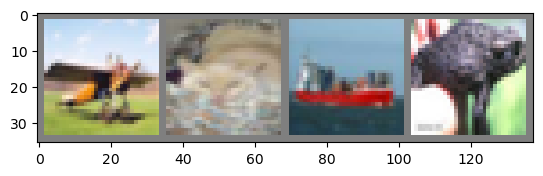

plane cat   ship  frog 


In [38]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [39]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [40]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [41]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.202
[1,  4000] loss: 1.856
[1,  6000] loss: 1.669
[1,  8000] loss: 1.549
[1, 10000] loss: 1.502
[1, 12000] loss: 1.462
[2,  2000] loss: 1.371
[2,  4000] loss: 1.352
[2,  6000] loss: 1.359
[2,  8000] loss: 1.324
[2, 10000] loss: 1.294
[2, 12000] loss: 1.259
Finished Training


In [88]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

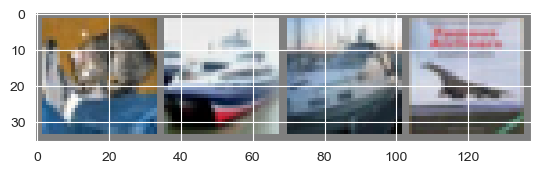

GroundTruth:  cat   ship  ship  plane


In [89]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [90]:
#load back in our saved model
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [91]:
outputs = net(images)

In [92]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  plane plane


In [93]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


In [94]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 61.8 %
Accuracy for class: car   is 72.8 %
Accuracy for class: bird  is 66.7 %
Accuracy for class: cat   is 33.2 %
Accuracy for class: deer  is 24.0 %
Accuracy for class: dog   is 32.9 %
Accuracy for class: frog  is 67.3 %
Accuracy for class: horse is 53.2 %
Accuracy for class: ship  is 66.9 %
Accuracy for class: truck is 55.2 %


In [95]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [96]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [97]:
inputs, labels = data[0].to(device), data[1].to(device)

In [ ]:
# Vanilla CNN for CIFAR10
- https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

#load back in our saved model
net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

net.to(device)

inputs, labels = data[0].to(device), data[1].to(device)